In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [126]:
train_data = os.path.join('./Combined/Train')
test_data = os.path.join('./Combined/Test')

In [127]:
activities = ['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [ ]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for activity in activities:
    folder = os.path.join(train_data,activity)
    data = os.listdir(folder)
    for csv in data:
        df=pd.read_csv(os.path.join(train_data,activity,csv),header=0)
        x_train.append(df.values[:500])
        y_train.append(activity)
for activity in activities:
    folder = os.path.join(test_data,activity)
    data = os.listdir(folder)
    for csv in data:
        df=pd.read_csv(os.path.join(test_data,activity,csv),header=0)
        x_test.append(df.values[:500])
        y_test.append(activity)
    

In [129]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(f"Shape of X_train = {x_train.shape}") 
print(f'Shape of y_train = {y_train.shape}')

x_test=np.array(x_test)
y_test=np.array(y_test)
print(f"Shape of X_test = {x_test.shape}")
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (126, 500, 3)
Shape of y_train = (126,)
Shape of X_test = (54, 500, 3)
Shape of y_test = (54,)


In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

### Task 2 Question 1

Raw Accelerometer data

In [131]:
total_acceleration = x_train[:,:,0]**2 + x_train[:,:,1]**2 + x_train[:,:,2]**2
total_acceleration_test = x_test[:,:,0]**2 + x_test[:,:,1]**2 + x_test[:,:,2]**2

Accuracy = 0.48148148148148145
Precision = 0.4714646464646465
Recall = 0.48148148148148145
F1 Score = 0.4601086048454469


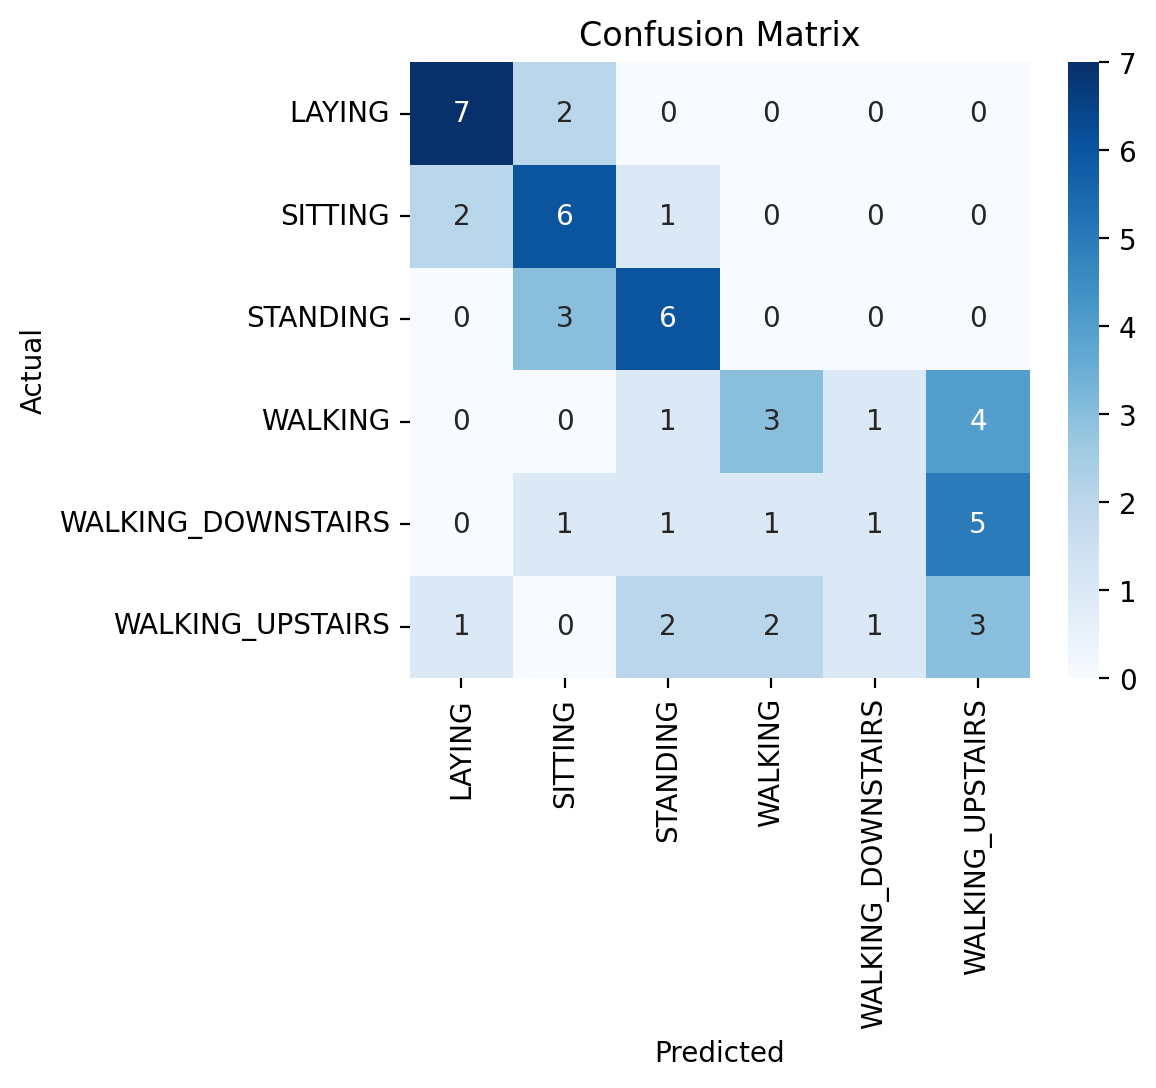

In [ ]:
# Training and evaluating the Decision Tree Classifier on raw data
raw_data_tree = DecisionTreeClassifier()
raw_data_tree.fit(total_acceleration,y_train)
y_pred = raw_data_tree.predict(total_acceleration_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Precision = {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test,y_pred,average='weighted')}")
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TSFEL Features

In [133]:
import tsfel
import tsfel.feature_extraction.features  

In [ ]:
def extract_features(data):
    features_list = []

    cfg = tsfel.get_features_by_domain()
    
    for i in range(data.shape[0]): 
        features = tsfel.time_series_features_extractor(cfg, data[i])
        features_list.append(features.values.flatten())
    
    return features_list

In [135]:
# Extract TSFEL features from training and test data
print("Extracting TSFEL features from training data...")
tsfel_features_train = np.array(extract_features(total_acceleration))

print("Extracting TSFEL features from test data...")
tsfel_features_test = np.array(extract_features(total_acceleration_test))


Extracting TSFEL features from training data...


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


Extracting TSFEL features from test data...


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


In [136]:
print(tsfel_features_train.shape)
print(tsfel_features_test.shape)

(126, 156)
(54, 156)


Accuracy = 0.7777777777777778
Precision = 0.7857142857142857
Recall = 0.7777777777777778
F1 Score = 0.7736620964175144


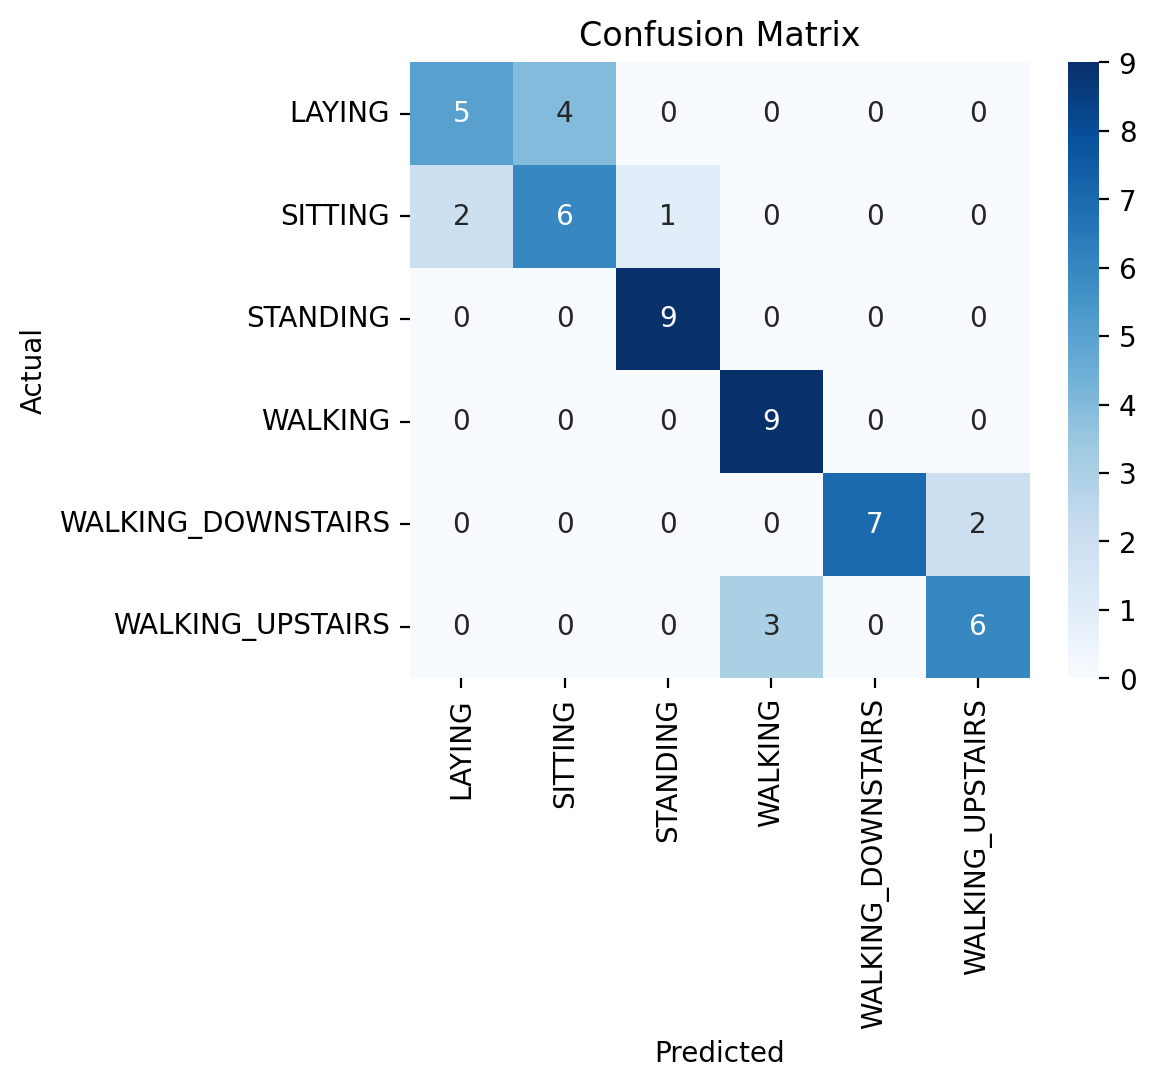

In [ ]:
# Training and evaluating the Decision Tree Classifier on TSFEL features
tsfel_tree = DecisionTreeClassifier()
tsfel_tree.fit(tsfel_features_train,y_train)
y_pred = tsfel_tree.predict(tsfel_features_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Precision = {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test,y_pred,average='weighted')}")
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Features Provided in the Dataset

In [138]:
X_train_features = np.loadtxt('UCI HAR Dataset/train/X_train.txt')
X_train_features.shape

(7352, 561)

In [139]:
y_train_features = np.loadtxt('UCI HAR Dataset/train/y_train.txt')
y_train_features.shape

(7352,)

In [140]:
X_test_features = np.loadtxt('UCI HAR Dataset/test/X_test.txt')
X_test_features.shape

(2947, 561)

In [141]:
y_test_features = np.loadtxt('UCI HAR Dataset/test/y_test.txt')
y_test_features.shape

(2947,)

Accuracy = 0.8540889039701391
Precision = 0.8543668480463115
Recall = 0.8540889039701391
F1 Score = 0.8535841118257019


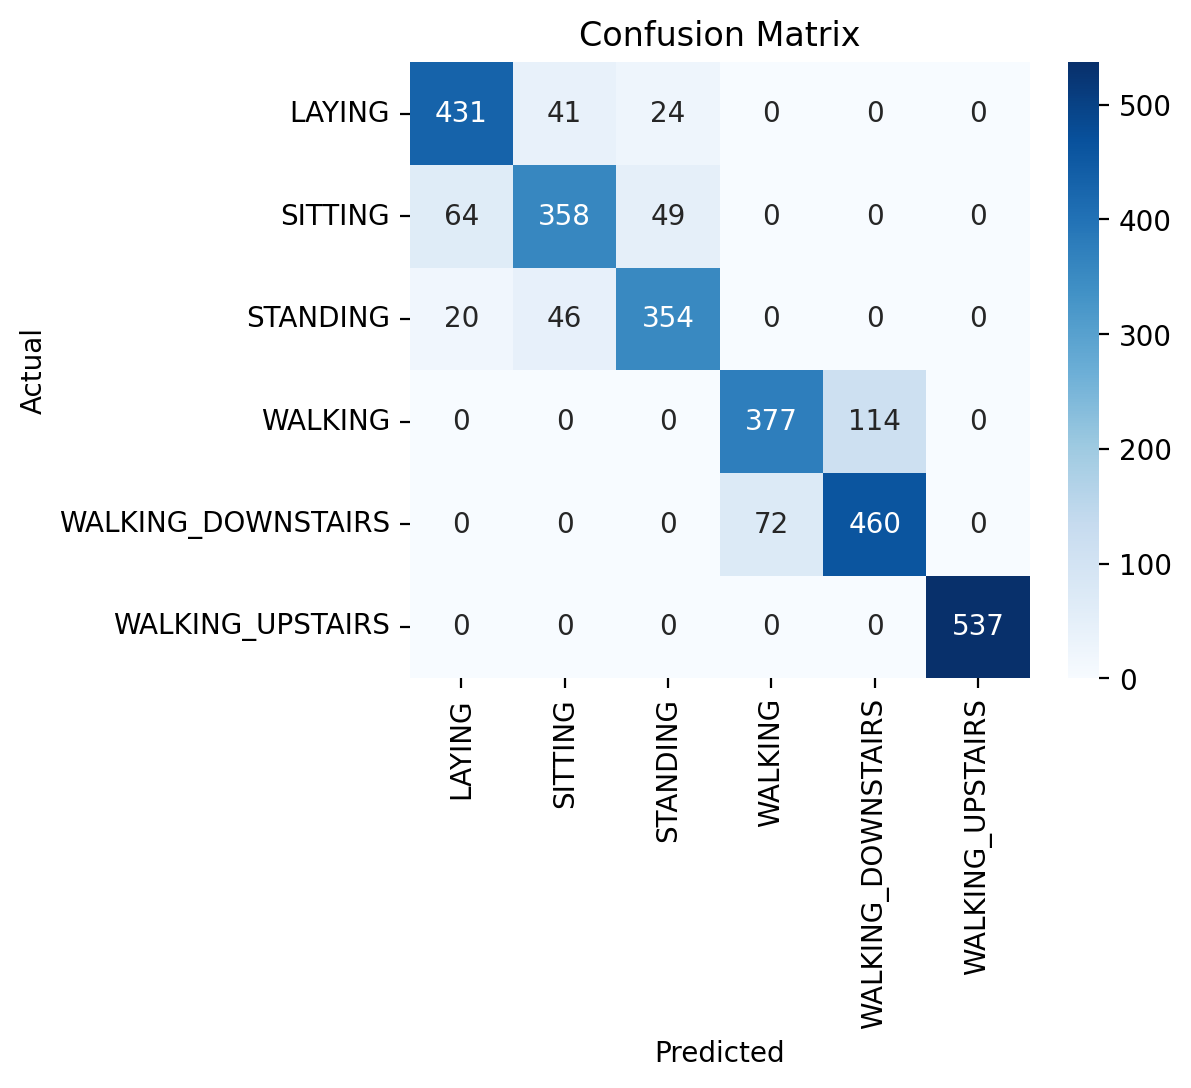

In [ ]:
# Training and evaluating the Decision Tree Classifier on features provided in the dataset
features_tree = DecisionTreeClassifier()
features_tree.fit(X_train_features,y_train_features)
y_pred = features_tree.predict(X_test_features)
print(f"Accuracy = {accuracy_score(y_test_features,y_pred)}")
print(f"Precision = {precision_score(y_test_features,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test_features,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test_features,y_pred,average='weighted')}")
cm = confusion_matrix(y_test_features,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The accuracies of the three models are:
1. Raw data: 48.14 %
2. TSFEL data: 77.77 %
3. Features in the dataset: 85.40 %
<br>
Therefore, the best model with respect to accuracy score is the model trained on features provided by the dataset.

### Task 2 Question 2


In [143]:
# Train Decision Trees with varying depths for all three methods
depths = range(2, 9)
raw_data_accuracies = []
tsfel_accuracies = []
features_accuracies = []

for depth in depths:
    # Method 1: Raw data (total acceleration)
    raw_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    raw_tree.fit(total_acceleration, y_train)
    raw_pred = raw_tree.predict(total_acceleration_test)
    raw_acc = accuracy_score(y_test, raw_pred)
    raw_data_accuracies.append(raw_acc)
    
    # Method 2: TSFEL features
    tsfel_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tsfel_tree.fit(tsfel_features_train, y_train)
    tsfel_pred = tsfel_tree.predict(tsfel_features_test)
    tsfel_acc = accuracy_score(y_test, tsfel_pred)
    tsfel_accuracies.append(tsfel_acc)
    
    # Method 3: UCI HAR features
    uci_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    uci_tree.fit(X_train_features, y_train_features)
    uci_pred = uci_tree.predict(X_test_features)
    uci_acc = accuracy_score(y_test_features, uci_pred)
    features_accuracies.append(uci_acc)
    
    print(f"Depth {depth}: Raw Data={raw_acc:.4f}, TSFEL={tsfel_acc:.4f}, UCI Features={uci_acc:.4f}")



Depth 2: Raw Data=0.4074, TSFEL=0.5926, UCI Features=0.5310
Depth 3: Raw Data=0.4630, TSFEL=0.7593, UCI Features=0.7224
Depth 4: Raw Data=0.5370, TSFEL=0.7037, UCI Features=0.8096
Depth 5: Raw Data=0.5556, TSFEL=0.7778, UCI Features=0.8385
Depth 6: Raw Data=0.5000, TSFEL=0.7593, UCI Features=0.8548
Depth 7: Raw Data=0.5000, TSFEL=0.7593, UCI Features=0.8622
Depth 8: Raw Data=0.5000, TSFEL=0.7593, UCI Features=0.8687


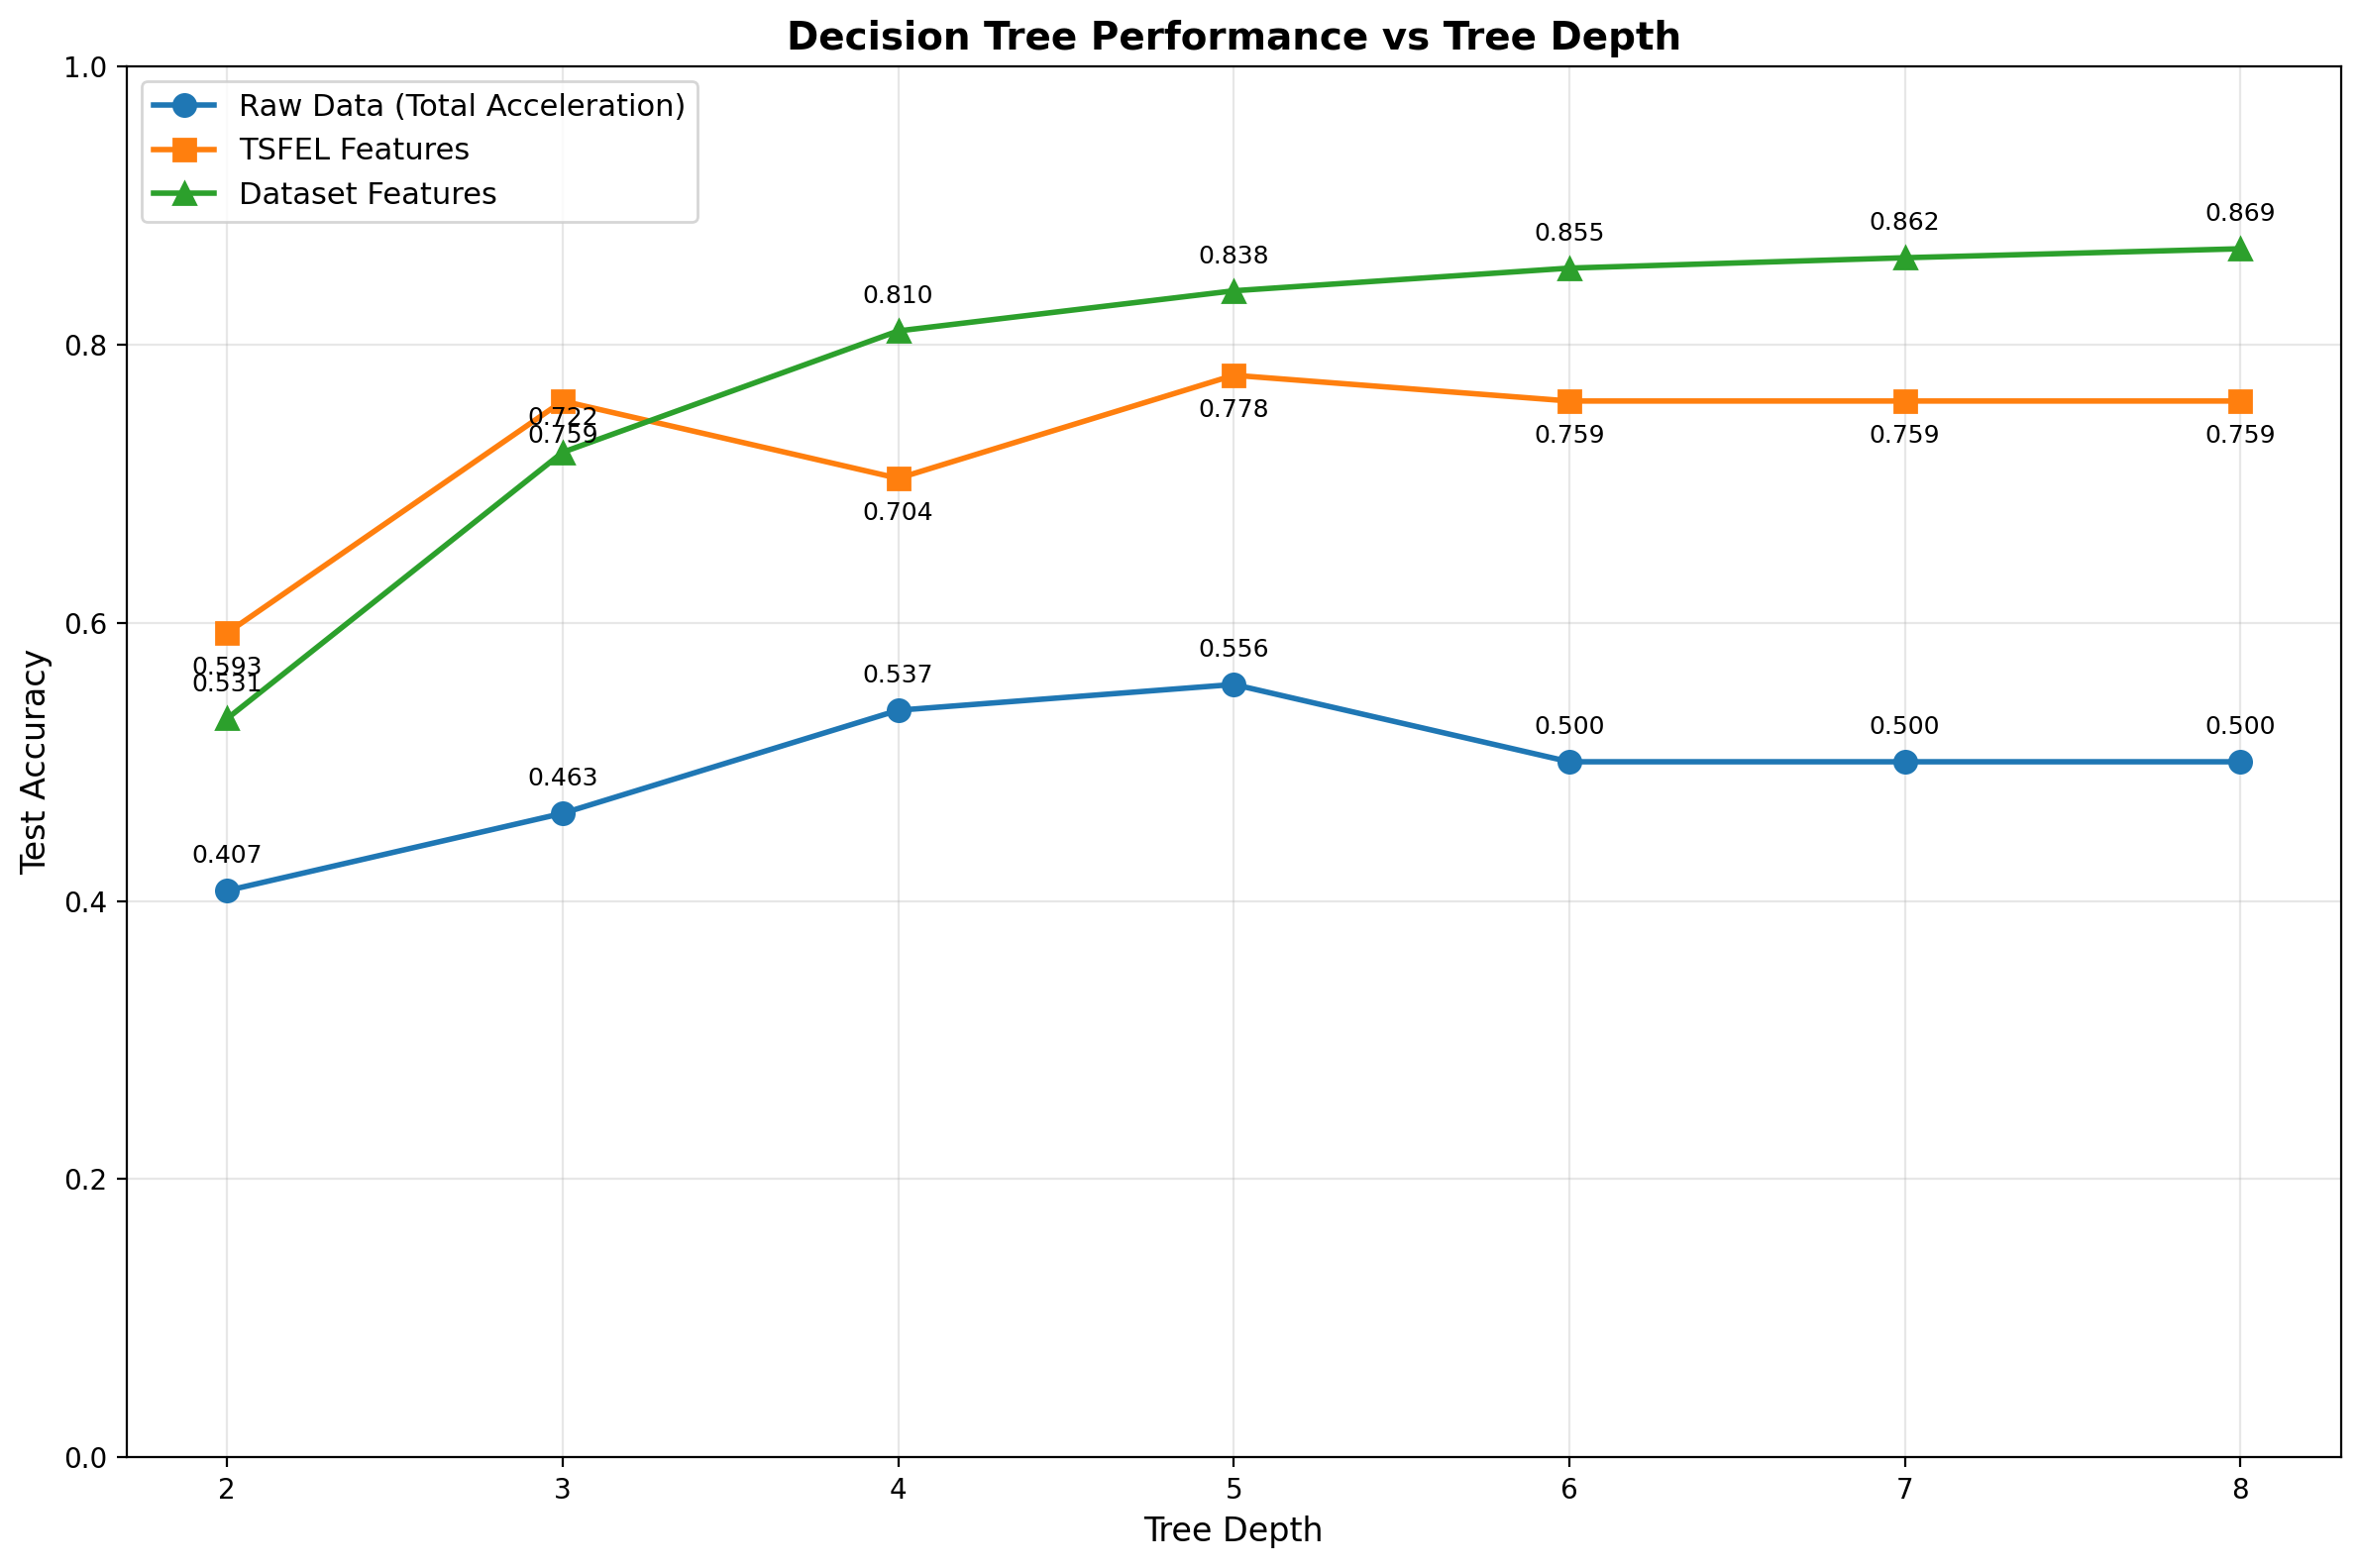

In [144]:
# Plot accuracy vs depth for all three methods
plt.figure(figsize=(12, 8))

plt.plot(depths, raw_data_accuracies, marker='o', linewidth=2, markersize=8, label='Raw Data (Total Acceleration)')
plt.plot(depths, tsfel_accuracies, marker='s', linewidth=2, markersize=8, label='TSFEL Features')
plt.plot(depths, features_accuracies, marker='^', linewidth=2, markersize=8, label='Dataset Features')

plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Decision Tree Performance vs Tree Depth', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.ylim(0, 1)

# Add value annotations on the plot
for i, depth in enumerate(depths):
    plt.annotate(f'{raw_data_accuracies[i]:.3f}', 
                (depth, raw_data_accuracies[i]), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    plt.annotate(f'{tsfel_accuracies[i]:.3f}', 
                (depth, tsfel_accuracies[i]), 
                textcoords="offset points", xytext=(0,-15), ha='center', fontsize=9)
    plt.annotate(f'{features_accuracies[i]:.3f}', 
                (depth, features_accuracies[i]), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Summary table
results_df = pd.DataFrame({
    'Depth': depths,
    'Raw Data Accuracy': raw_data_accuracies,
    'TSFEL Accuracy': tsfel_accuracies,
    'Dataset Features Accuracy': features_accuracies
})

print("Summary Table:")
print(results_df.round(4))

# Find the best depth for each method
best_raw_depth = depths[np.argmax(raw_data_accuracies)]
best_tsfel_depth = depths[np.argmax(tsfel_accuracies)]
best_uci_depth = depths[np.argmax(features_accuracies)]

print(f"\nBest performing depths:")
print(f"Raw Data: Depth {best_raw_depth} (Accuracy: {max(raw_data_accuracies):.4f})")
print(f"TSFEL: Depth {best_tsfel_depth} (Accuracy: {max(tsfel_accuracies):.4f})")
print(f"Dataset Features: Depth {best_uci_depth} (Accuracy: {max(features_accuracies):.4f})")

Summary Table:
   Depth  Raw Data Accuracy  TSFEL Accuracy  Dataset Features Accuracy
0      2             0.4074          0.5926                     0.5310
1      3             0.4630          0.7593                     0.7224
2      4             0.5370          0.7037                     0.8096
3      5             0.5556          0.7778                     0.8385
4      6             0.5000          0.7593                     0.8548
5      7             0.5000          0.7593                     0.8622
6      8             0.5000          0.7593                     0.8687

Best performing depths:
Raw Data: Depth 5 (Accuracy: 0.5556)
TSFEL: Depth 5 (Accuracy: 0.7778)
Dataset Features: Depth 8 (Accuracy: 0.8687)


### Task 2 Question 3

#### There isn't any specific activity where the model pereforms bad. 
However, it is seen from the confusion matrices, that the model is able to distinguish static from dynamic activities. However, the model is misclalssifying sometimes between walking, walking_upstairs and walking_downstairs, and between laying, sitting and standing. This is because static activities and dynamic activities give very different readings

### Task 3 Question 1

In [164]:
recorded_folder_path = os.path.join('Recorded_Dataset')
csv_files = os.listdir(recorded_folder_path)
X_train = []
X_total_acceleration = []
y = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"] * 5

for csv in csv_files:
    if not csv.endswith('.csv'):
        continue  # skip non-csv files like .DS_Store
    df = pd.read_csv(os.path.join(recorded_folder_path, csv), header=0)
    data = df.values[:, 1:4]
    acc = df.values[:, 4]
    n = data.shape[0]
    if n >= 500:
        start = (n - 500) // 2
        end = start + 500
        data_500 = data[start:end]
        acc_500 = acc[start:end]
    else:
        pad_before = (500 - n) // 2
        pad_after = 500 - n - pad_before
        data_500 = np.vstack([
            np.repeat(data[0:1], pad_before, axis=0),
            data,
            np.repeat(data[-1:], pad_after, axis=0)
        ])
        acc_500 = np.concatenate([
            np.repeat(acc[0], pad_before),
            acc,
            np.repeat(acc[-1], pad_after)
        ])
    X_train.append(data_500)
    X_total_acceleration.append(acc_500)

In [165]:
recorded_data_prediction = raw_data_tree.predict(X_total_acceleration)
recorded_data_prediction

array(['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
       'WALKING', 'STANDING', 'WALKING', 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'STANDING', 'STANDING', 'WALKING', 'WALKING',
       'WALKING_UPSTAIRS', 'STANDING', 'WALKING_UPSTAIRS', 'WALKING',
       'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'STANDING',
       'WALKING', 'WALKING_UPSTAIRS', 'WALKING', 'STANDING', 'WALKING'],
      dtype='<U18')

In [166]:
for i in range(len(y)):
    print(f"Actual: {y[i]}, Predicted: {recorded_data_prediction[i]}")

Actual: LAYING, Predicted: STANDING
Actual: SITTING, Predicted: STANDING
Actual: STANDING, Predicted: STANDING
Actual: WALKING, Predicted: STANDING
Actual: WALKING_DOWNSTAIRS, Predicted: STANDING
Actual: WALKING_UPSTAIRS, Predicted: WALKING_UPSTAIRS
Actual: LAYING, Predicted: WALKING_UPSTAIRS
Actual: SITTING, Predicted: WALKING_DOWNSTAIRS
Actual: STANDING, Predicted: WALKING
Actual: WALKING, Predicted: STANDING
Actual: WALKING_DOWNSTAIRS, Predicted: WALKING
Actual: WALKING_UPSTAIRS, Predicted: WALKING_UPSTAIRS
Actual: LAYING, Predicted: WALKING_UPSTAIRS
Actual: SITTING, Predicted: STANDING
Actual: STANDING, Predicted: STANDING
Actual: WALKING, Predicted: WALKING
Actual: WALKING_DOWNSTAIRS, Predicted: WALKING
Actual: WALKING_UPSTAIRS, Predicted: WALKING_UPSTAIRS
Actual: LAYING, Predicted: STANDING
Actual: SITTING, Predicted: WALKING_UPSTAIRS
Actual: STANDING, Predicted: WALKING
Actual: WALKING, Predicted: WALKING_DOWNSTAIRS
Actual: WALKING_DOWNSTAIRS, Predicted: WALKING_UPSTAIRS
Actual:

Accuracy = 0.23333333333333334
Precision = 0.12984006734006734
Recall = 0.23333333333333334
F1 Score = 0.1662087912087912


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


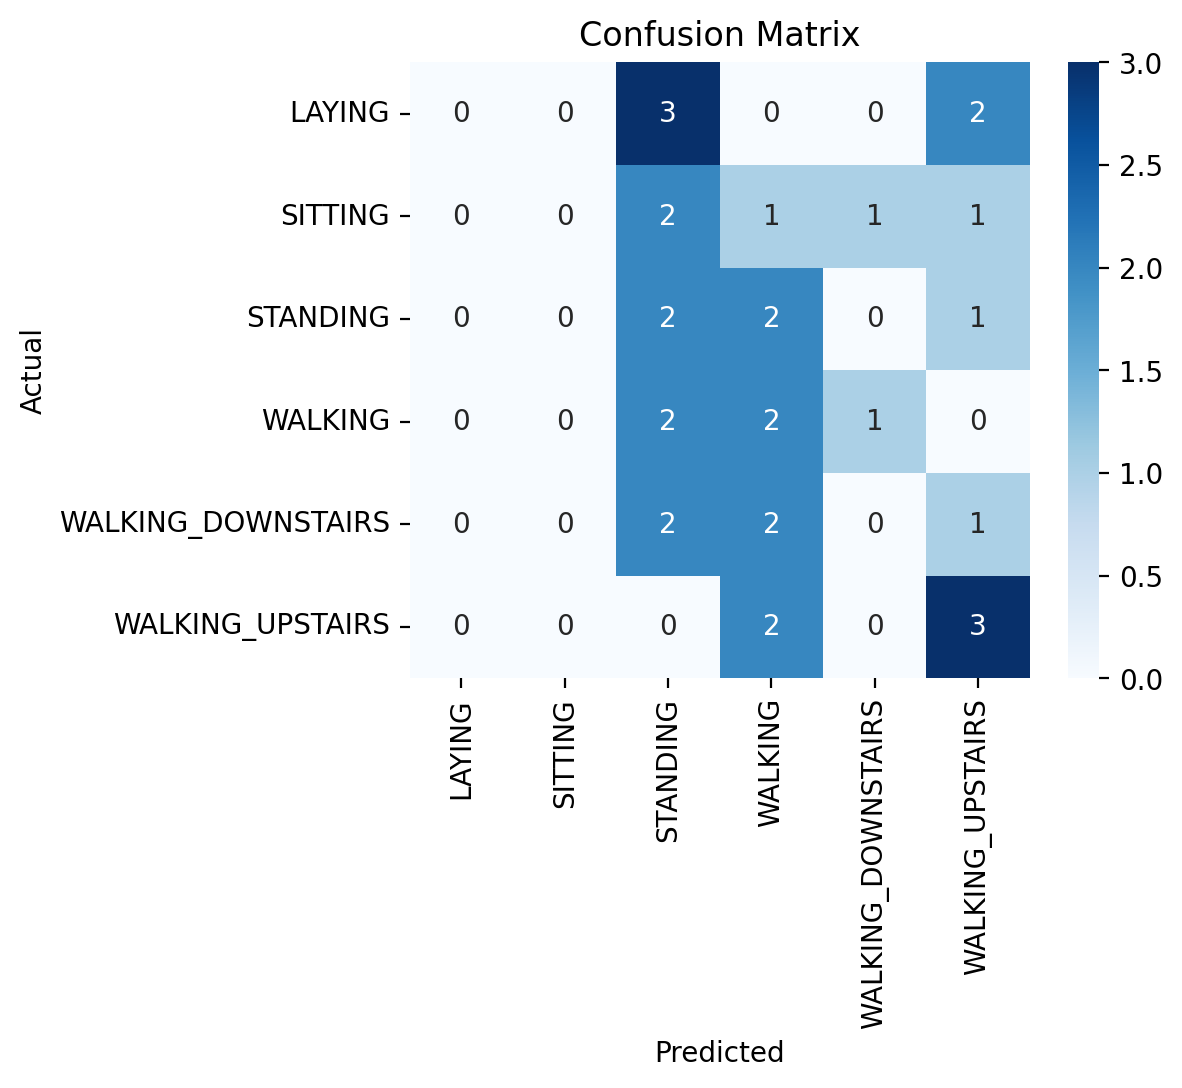

In [167]:

print(f"Accuracy = {accuracy_score(y,recorded_data_prediction)}")
print(f"Precision = {precision_score(y,recorded_data_prediction,average='weighted')}")
print(f"Recall = {recall_score(y,recorded_data_prediction,average='weighted')}")
print(f"F1 Score = {f1_score(y,recorded_data_prediction,average='weighted')}")
cm = confusion_matrix(y,recorded_data_prediction)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [170]:
recorded_tsfel_features = np.array(extract_features(np.array(X_total_acceleration)))
recorded_tsfel_prediction = tsfel_tree.predict(recorded_tsfel_features)

/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


Accuracy = 0.2
Precision = 0.10441176470588236
Recall = 0.2
F1 Score = 0.13006993006993006


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


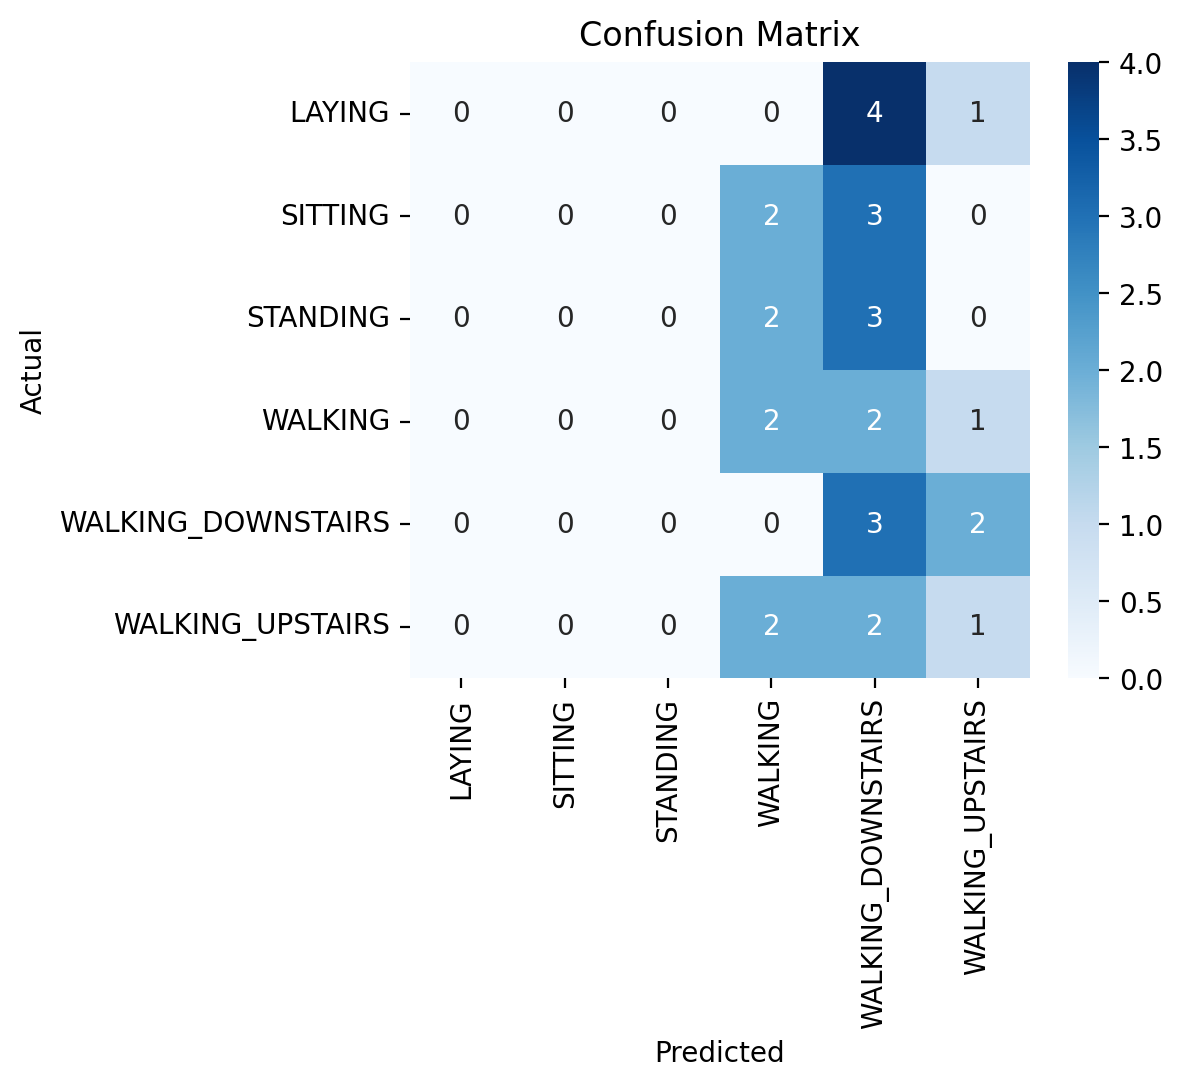

In [171]:

print(f"Accuracy = {accuracy_score(y,recorded_tsfel_prediction)}")
print(f"Precision = {precision_score(y,recorded_tsfel_prediction,average='weighted')}")
print(f"Recall = {recall_score(y,recorded_tsfel_prediction,average='weighted')}")
print(f"F1 Score = {f1_score(y,recorded_tsfel_prediction,average='weighted')}")
cm = confusion_matrix(y,recorded_tsfel_prediction)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### The Decision tree was already trained in the previous tasks and now it is tested on the actual recorded data. The TSFEL featuried data gave more accuracy, precision, recall as well as F1 score than the raw data.

### Task 3 Question 2


Raw Acceleration Data

In [ ]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the activities
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

# Function to get activity from filename
def get_activity_from_filename(fname):
    fname = fname.lower()
    if "walkingupstairs" in fname or "walking_upstairs" in fname:
        return "WALKING_UPSTAIRS"
    elif "walkingdownstairs" in fname or "walking_downstairs" in fname:
        return "WALKING_DOWNSTAIRS"
    elif "walking" in fname:
        return "WALKING"
    elif "sitting" in fname:
        return "SITTING"
    elif "standing" in fname:
        return "STANDING"
    elif "laying" in fname:
        return "LAYING"
    else:
        return "UNKNOWN"

# Load and organize data by activity
recorded_folder_path = 'Recorded_Dataset'
csv_files = [f for f in os.listdir(recorded_folder_path) if f.endswith('.csv')]

# Group files by activity
activity_files = {activity: [] for activity in activities}
for csv_file in csv_files:
    activity = get_activity_from_filename(csv_file)
    if activity in activities:
        activity_files[activity].append(csv_file)

# For each activity, select 4 random files for training and 1 for testing
train_files = []
test_files = []
for activity, files in activity_files.items():
    if len(files) >= 5:
        # Randomly select 4 files for training
        selected_train = random.sample(files, 4)
        # Use the remaining file for testing
        selected_test = [f for f in files if f not in selected_train][0]
        
        train_files.extend(selected_train)
        test_files.append(selected_test)

# Process training data
X_train = []
y_train = []

for csv_file in train_files:
    df = pd.read_csv(os.path.join(recorded_folder_path, csv_file), header=0)
    data = df.values[:, -1] 
    n = data.shape[0]
    if n >= 500:
        start = (n - 500) // 2
        end = start + 500
        data = data[start:end]
    else:
        pad_before = (500 - n) // 2
        pad_after = 500 - n - pad_before
        data = np.concatenate([
            np.repeat(data[0], pad_before),
            data,
            np.repeat(data[-1], pad_after)
        ])
    X_train.append(data)
    y_train.append(get_activity_from_filename(csv_file))

X_train = np.array(X_train)
y_train = np.array(y_train)
# Train decision tree
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [157]:
X_test = []
y_test = []
for csv_file in test_files:
    df = pd.read_csv(os.path.join(recorded_folder_path, csv_file), header=0)
    data = df.values[:, -1]  # Total acceleration
    n = data.shape[0]
    if n >= 500:
        start = (n - 500) // 2
        end = start + 500
        data = data[start:end]
    else:
        pad_before = (500 - n) // 2
        pad_after = 500 - n - pad_before
        data = np.concatenate([
            np.repeat(data[0], pad_before),
            data,
            np.repeat(data[-1], pad_after)
        ])
    
    X_test.append(data)
    y_test.append(get_activity_from_filename(csv_file))

X_test = np.array(X_test)
y_test = np.array(y_test)

Train files: ['tirth_laying.csv', 'Anirudh_laying.csv', 'jatin_laying.csv', 'anuj_laying.csv', 'anuj_sitting.csv', 'Anirudh_sitting.csv', 'jatin_sitting.csv', 'tirth_sitting.csv', 'Anirudh_standing.csv', 'tirth_standing.csv', 'anuj_standing.csv', 'jatin_standing.csv', 'jatin_walking.csv', 'Anirudh_walking.csv', 'yug_walking.csv', 'anuj_walking.csv', 'Anirudh_walkingdownstairs.csv', 'tirth_walkingdownstairs.csv', 'anuj_walkingdownstairs.csv', 'jatin_walkingdownstairs.csv', 'jatin_walkingupstairs.csv', 'yug_walkingupstairs.csv', 'anuj_walkingupstairs.csv', 'tirth_walkingupstairs .csv']
Test files: ['yug_laying.csv', 'yug_sitting.csv', 'yug_standing.csv', 'tirth_walking.csv', 'yug_walkingdownstairs.csv', 'Anirudh_walkingupstairs.csv']

Activity-wise predictions:
File: yug_laying.csv, True: LAYING, Predicted: LAYING
File: yug_sitting.csv, True: SITTING, Predicted: STANDING
File: yug_standing.csv, True: STANDING, Predicted: STANDING
File: tirth_walking.csv, True: WALKING, Predicted: WALKING

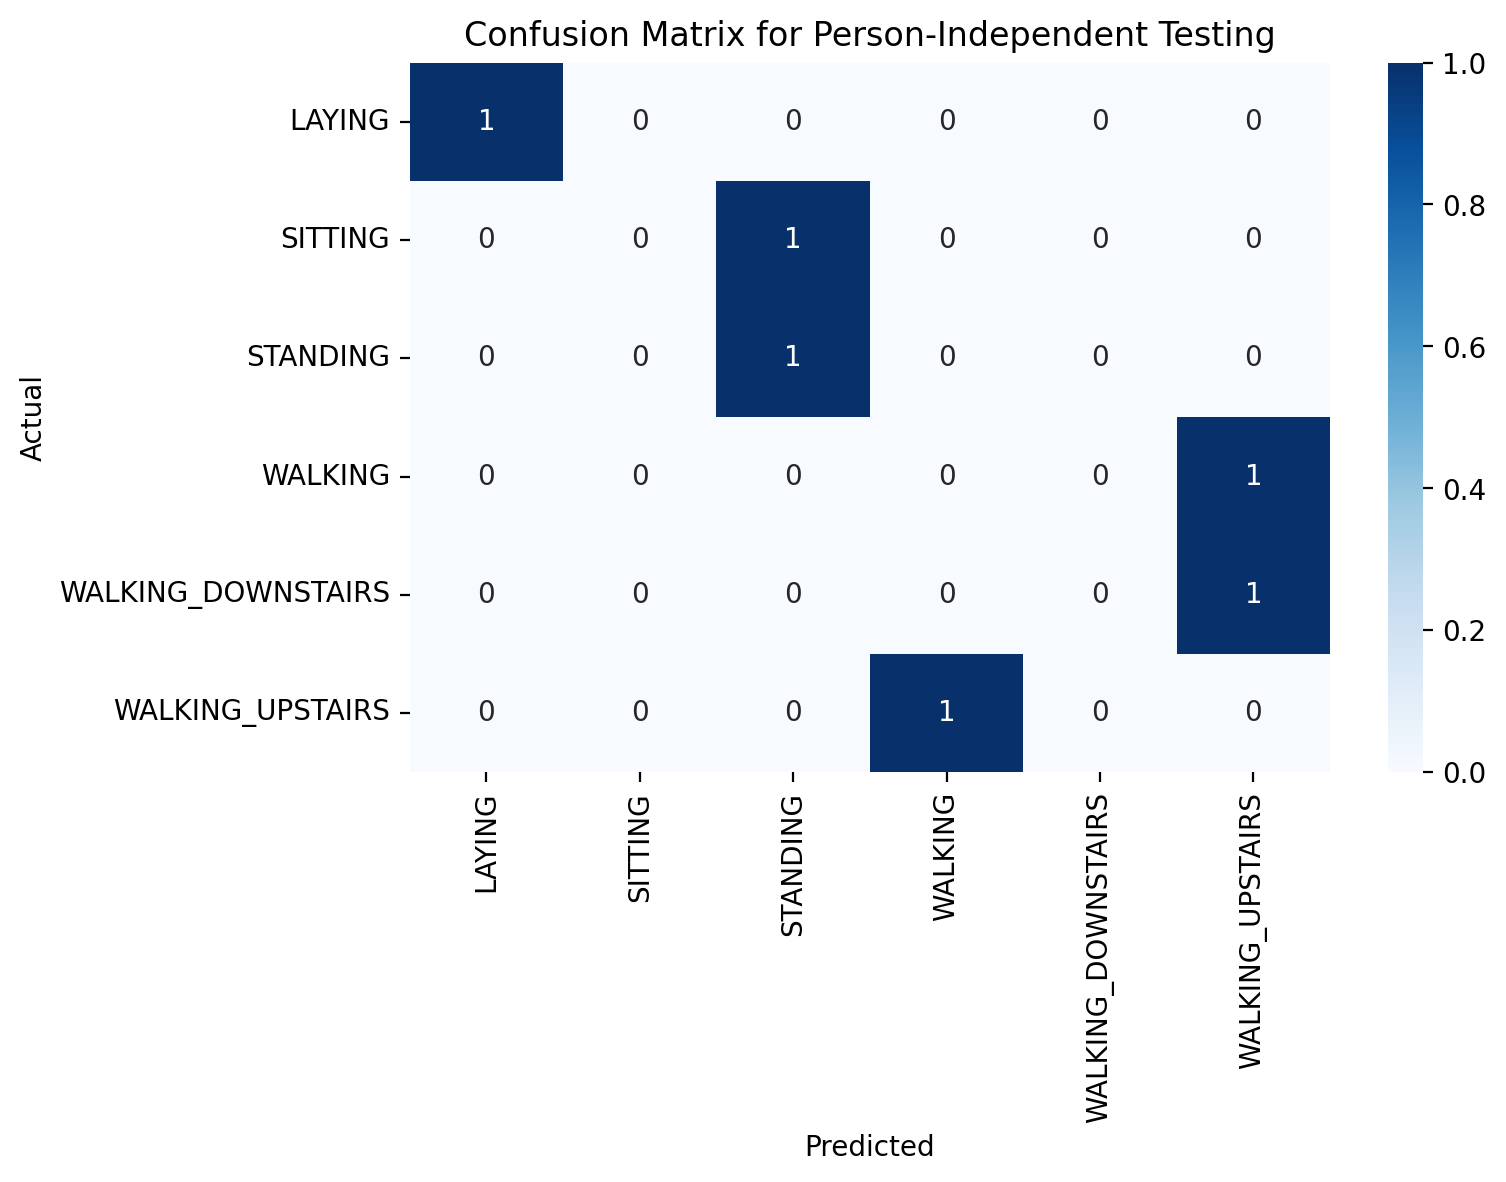

In [158]:

y_pred = dt_classifier.predict(X_test)

# Print results
print("Train files:", train_files)
print("Test files:", test_files)
print("\nActivity-wise predictions:")
for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    print(f"File: {test_files[i]}, True: {true}, Predicted: {pred}")

# Calculate metrics
print(f"\nAccuracy = {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision = {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall = {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score = {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix for Person-Independent Testing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


TSFEL Featured Data

In [ ]:
recorded_folder_path = 'Recorded_Dataset'
csv_files = [f for f in os.listdir(recorded_folder_path) if f.endswith('.csv')]

# Group files by activity
activity_files = {activity: [] for activity in activities}
for csv_file in csv_files:
    activity = get_activity_from_filename(csv_file)
    if activity in activities:
        activity_files[activity].append(csv_file)

# For each activity, select 4 random files for training and 1 for testing
train_files = []
test_files = []
for activity, files in activity_files.items():
    if len(files) >= 5:
        # Randomly select 4 files for training
        selected_train = random.sample(files, 4)
        # Use the remaining file for testing
        selected_test = [f for f in files if f not in selected_train][0]
        
        train_files.extend(selected_train)
        test_files.append(selected_test)

# Process training data
X_train = []
y_train = []

for csv_file in train_files:
    df = pd.read_csv(os.path.join(recorded_folder_path, csv_file), header=0)
    data = df.values[:, -1] 
    n = data.shape[0]
    if n >= 500:
        start = (n - 500) // 2
        end = start + 500
        data = data[start:end]
    else:
        pad_before = (500 - n) // 2
        pad_after = 500 - n - pad_before
        data = np.concatenate([
            np.repeat(data[0], pad_before),
            data,
            np.repeat(data[-1], pad_after)
        ])
    data = data.reshape(1,-1)

    X_train.append(data)
    y_train.append(get_activity_from_filename(csv_file))

X_train = np.array(X_train).reshape(len(X_train),500)
y_train = np.array(y_train)
X_train = extract_features(X_train)
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)



/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


DecisionTreeClassifier(max_depth=5, random_state=42)

/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


/var/folders/9n/364hn3wn7lbgfdhs4pjxgwc40000gn/T/ipykernel_19073/913105780.py:7: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(cfg, data[i])


Train files: ['jatin_laying.csv', 'tirth_laying.csv', 'Anirudh_laying.csv', 'yug_laying.csv', 'Anirudh_sitting.csv', 'tirth_sitting.csv', 'jatin_sitting.csv', 'anuj_sitting.csv', 'Anirudh_standing.csv', 'yug_standing.csv', 'tirth_standing.csv', 'anuj_standing.csv', 'anuj_walking.csv', 'Anirudh_walking.csv', 'jatin_walking.csv', 'tirth_walking.csv', 'yug_walkingdownstairs.csv', 'Anirudh_walkingdownstairs.csv', 'jatin_walkingdownstairs.csv', 'tirth_walkingdownstairs.csv', 'anuj_walkingupstairs.csv', 'yug_walkingupstairs.csv', 'jatin_walkingupstairs.csv', 'Anirudh_walkingupstairs.csv']
Test files: ['anuj_laying.csv', 'yug_sitting.csv', 'jatin_standing.csv', 'yug_walking.csv', 'anuj_walkingdownstairs.csv', 'tirth_walkingupstairs .csv']

Activity-wise predictions:
File: anuj_laying.csv, True: LAYING, Predicted: LAYING
File: yug_sitting.csv, True: SITTING, Predicted: SITTING
File: jatin_standing.csv, True: STANDING, Predicted: STANDING
File: yug_walking.csv, True: WALKING, Predicted: WALKING

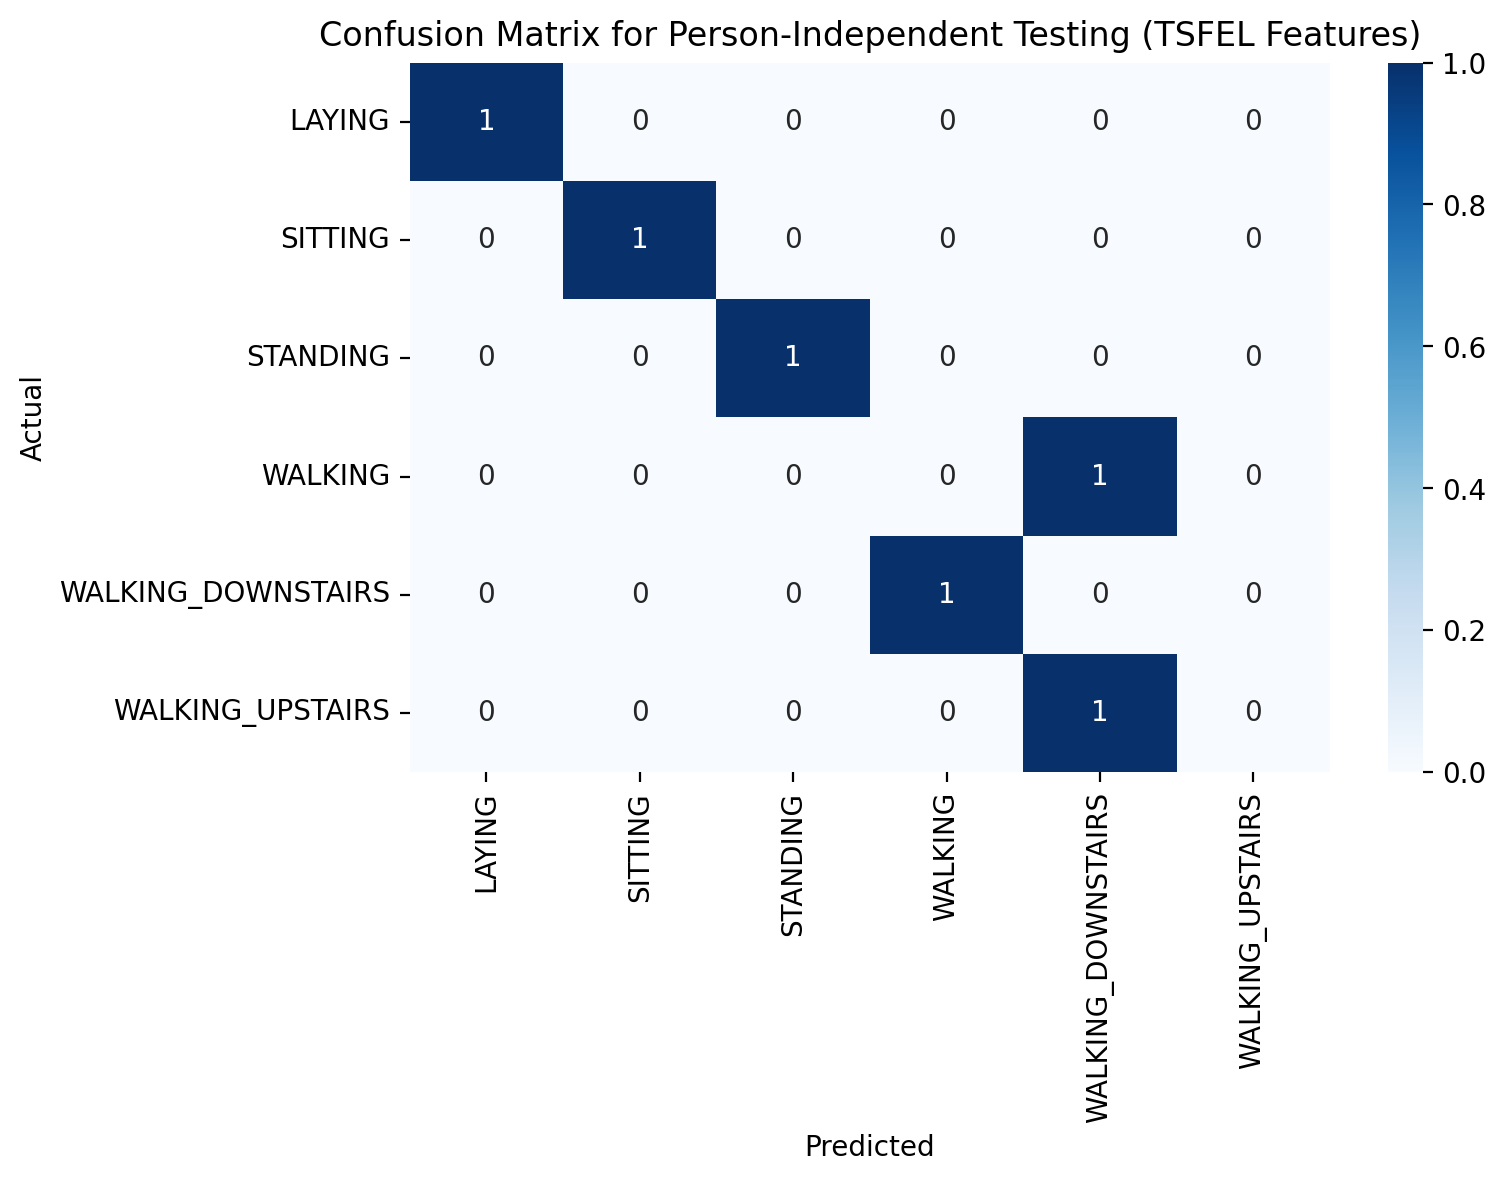

In [172]:
X_test = []
y_test = []
for csv_file in test_files:
    df = pd.read_csv(os.path.join(recorded_folder_path, csv_file), header=0)
    data = df.values[:, -1]  # Total acceleration
    n = data.shape[0]
    if n >= 500:
        start = (n - 500) // 2
        end = start + 500
        data = data[start:end]
    else:
        pad_before = (500 - n) // 2
        pad_after = 500 - n - pad_before
        data = np.concatenate([
            np.repeat(data[0], pad_before),
            data,
            np.repeat(data[-1], pad_after)
        ])
    
    X_test.append(data)
    y_test.append(get_activity_from_filename(csv_file))

X_test = np.array(X_test).reshape(len(X_test),500)
y_test = np.array(y_test)
X_test = extract_features(X_test)
y_pred = dt_classifier.predict(X_test)
# Print results
print("Train files:", train_files)
print("Test files:", test_files)
print("\nActivity-wise predictions:")
for i, (true, pred) in enumerate(zip(y_test, y_pred)):
    print(f"File: {test_files[i]}, True: {true}, Predicted: {pred}")
# Calculate metrics
print(f"\nAccuracy = {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision = {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall = {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score = {f1_score(y_test, y_pred, average='weighted'):.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix for Person-Independent Testing (TSFEL Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



The decision Tree trained and tested on the recorded data gave more accuracy than the decision tree trained on the UCI HAR Dataset. This was observed because the two datasets were recorded in different conditions and different methods. 
When the Decision tree was trained and tested on same dataset the accuracy was higher due to similerness in data and noise conditions